# Grid Cell Accuracy

For a set of `M` grid cell modules, each with a separate resolution and orientation, we want to calculate the expected error for a random point in space converted into a grid cell representation and then back to coordinates.

The actual answer is that there are infinite locations that are infinitely far apart for any given representation so we have to assume that we restrict the space under consideration to something small enough in which a given set of grid cells has a single possible region.

Below, `W_i` is the width of grid cell module `i`, where `i` is in the range `[1, M]`. The width representations the average distance traveled in space before the grid cell changes. This value is the average, which is calculated based on different angles as such, with `W` for given theta being specific to the lattice being used (triangular vs square, etc):

$$\frac{\int_{\theta=0}^{\pi/2}W_{i}^{\theta}}{\pi/2}$$

First, we calculate the joint width, or average distance traveled in a given angle before a change in any of the `M` grid modules. Each module is assumed to have a different orientation and width, although this isn't strictly necessary as long as no two modules share both a width and orientation.

$$avgDist = \frac{1}{\sum_{i=1}^{M}1/W_{i}}$$

The expected distance traveled before a change will be half of the average distance:

$$E(distance) = \frac{avgDist}{2}$$

So if we have 10 modules, each with width 1.0, we find that the average error is:

$$E(distance) = \frac{1}{2 * \sum_{i=1}^{10}1} = 1/20 = 0.05$$

The actual error will be slightly larger than this since we don't know which grid cells is "closest" to the actual point so we have to find the area in which the grid cells agree and report the center of that area as the decoded value. This will result in higher error but the bound that `E(distance)` provides is a reasonable estimate.


## A Note on Triangle vs. Square Lattices

We can approximate `W` for triangles and squares by using the length of one edge rather than computing the exact average distance traveled. This provides an optimistic bound.

## Computing 2D Accuracy Error

We have computed the error along a certain axis. Doing so allows averaging the frequencies at which the grid cells change. But in order to properly compute the 2D error, we can't just calculate it from `E_x` and `E_y`. Instead, we have to use the joint probability distribution for each module and compute the expected 2D distance based on the joint probability distributions in the `x` and `y` dimensions. That is left as future work.

## Plot It!

Here I plot the case of modules with the same unit length width. In general, the smallest widths will dominate the error computation unless there are many more modules at the larger resolutions than at the smaller.

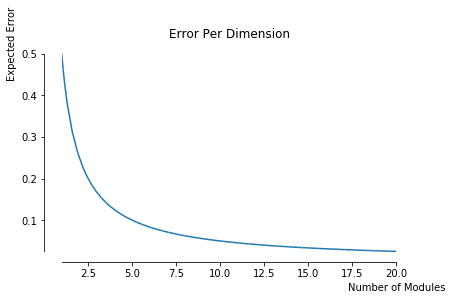

In [1]:
from sympy import *
from sympy.plotting import plot
init_printing()
%matplotlib inline

M = symbols('M')
error = 1 / (2 * M)

plot(error, (M, 1, 20), axis_center=(0, 0), xlabel='Number of Modules', ylabel='Expected Error', title='Error Per Dimension')

## Multiple Scales

Below I do the same plot but with half of the modules having unit width and half having 10 times unit width. So with 2 modules, one has width `1.0` and the other has width `10.0`. As you increase the number of modules, there are always half with width `1.0` and half with `10.0`.

Notice that the expected error looks similar despite plotting out to 40 modules instead of 20? That is because the smaller width modules dominate the error calculation and the half of modules with width `10.0` provide a minimal contribution to reducing the error rate.

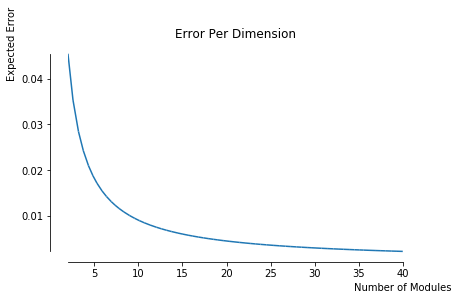

In [2]:
error = 1 / (2 * (M/2 + (10*M/2)))

plot(error, (M, 2, 40), axis_center=(0, 0), xlabel='Number of Modules', ylabel='Expected Error', title='Error Per Dimension')